# What is the Best Neighborhood in Pittsburgh?
## Group: Where is D? 
### By: Emma, Sophie, and Darian 
---

<h3> Introduction: </h3>

<h4> We decided to compare the length of steps to the number of playgrounds in a neighborhood to determine the best neighborhood in Pittsburgh. Our first step was to isolate the length of steps from the step file and see the neighborhoods that correlated with those values. Then we looked at the number of playgrounds documented per each neighborhood since in the documents the neighborhoods were duplicated. In order to do this, we made dictionaries to be able to see the number of playgrounds per each park. Then we found the average of the steps in the number of neighborhoods and the average of playgrounds in the number of neighborhoods....</h4> 

In [106]:
import pandas as pd
import operator
from collections import OrderedDict, defaultdict, Counter
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot, transforms

In [90]:
steps = pd.read_csv("steps.csv")
steps.head(10)

,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1687549925,Walden St from Westwood St to Larkfield Way,5th Division,NaN,Wood,125.0,58.0,0.0,100.0,1145.0,...,Mount Washington,2.0,19,42003191500,5,19,3,4-27,40.424183,-80.005725
1,1074700399,1017 St Martin St,4th Division,NaN,Concrete,52.0,NaN,NaN,NaN,NaN,...,South Side Slopes,3.0,17,42003170600,3,17,3,4-6,40.422471,-79.987604
2,652746099,56th St from Carnegie St to Duncan St,2nd Division,1946-01-01,Concrete,468.0,249.0,0.0,100.0,507.0,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.483330,-79.946816
3,1983187753,Kendall St from Kent Way to Duncan St,2nd Division,1951-01-01,Concrete,433.0,163.0,NaN,NaN,NaN,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.481533,-79.947972
4,249264327,56th St from Duncan to Wickliff St,2nd Division,1946-01-01,Concrete,167.0,26.0,NaN,NaN,NaN,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.482625,-79.945932
5,1480562482,56th St from Wickliff St to Celadine St,2nd Division,1946-01-01,Concrete,383.0,119.0,0.0,100.0,517.0,...,Stanton Heights,7.0,10,42003101800,2,10,5,3-5,40.482110,-79.945384
6,1021306396,Elbon Way from Wymore St to Weston Way,5th Division,1947-01-01,Concrete,86.0,NaN,1.0,7.0,573.0,...,Elliott,2.0,20,42003562600,5,20,6,1-17,40.440554,-80.042389
7,953989185,Kennilworth St to Brookline Blvd,4th Division,NaN,Concrete,30.0,20.0,1.0,6.0,524.0,...,Brookline,4.0,19,42003191900,5,19,6,4-26,40.395849,-80.026838
8,359109323,Kent Way from 54th St to Kendall St,2nd Division,1951-01-01,Concrete,247.0,35.0,NaN,NaN,NaN,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.481779,-79.949011
9,1839403022,Kenton Way from Federal St to Lithgow Ave,1st Division,1949-01-01,Concrete,307.0,NaN,1.0,9.0,691.0,...,Perry South,6.0,25,42003261400,1,25,1,1-10,40.461954,-80.009398


In [91]:
playground = pd.read_csv("playground2.csv")
playground.head(5)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,420573029,Armstrong Playground,NaN,Parks - Southern,Armstrong Park,S 12TH ST,https://tools.wprdc.org/images/pittsburgh/play...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428165,-79.986121
1,113170092,Arsenal Playground,NaN,Parks - Northeast,Arsenal Park,40TH ST,https://tools.wprdc.org/images/pittsburgh/play...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466721,-79.961520
2,2089697067,August WIlson Playground,NaN,Parks - Schenley,August Wilson Park,CLIFF ST,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.446510,-79.985968
3,2124405123,Banksville Playground,NaN,Parks - Western,Banksville Park,CRANE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Banksville,2,20,42003202300,5,20,6,4-9,40.414666,-80.039342
4,202656658,Baxter Playground,NaN,Parks - Eastern,Baxter Park,FRANKSTOWN AVE,https://tools.wprdc.org/images/pittsburgh/play...,Homewood North,9,13,42003130200,2,13,5,3-17,40.456141,-79.889501


In [92]:
group_neighborhood = steps.groupby("neighborhood")
sumofsteps = group_neighborhood["length"].sum().sort_values(ascending = False)
print(sumofsteps)
length = len(group_neighborhood)
print(length)

neighborhood
South Side Slopes        16305.0
Beechview                 9834.0
Perry South               7696.0
Mount Washington          6368.0
Brookline                 5806.0
Hazelwood                 5408.0
Marshall-Shadeland        5376.0
Carrick                   4990.0
Sheraden                  4496.0
Greenfield                4440.0
Fineview                  3821.0
Elliott                   3821.0
Duquesne Heights          3276.0
Overbrook                 3259.0
Perry North               2971.0
Beltzhoover               2672.0
Spring Hill-City View     2611.0
Polish Hill               2599.0
Troy Hill                 2577.0
Upper Hill                2390.0
Upper Lawrenceville       2358.0
Crafton Heights           2344.0
Stanton Heights           2139.0
East Hills                2100.0
Garfield                  2062.0
Arlington                 1836.0
California-Kirkbride      1737.0
Banksville                1549.0
Middle Hill               1490.0
Squirrel Hill South       1481

In [93]:
addsteps = sumofsteps.sum()
print(addsteps)
averagesteps = addsteps/length
print(averagesteps)

143632.0
2051.885714285714


In [94]:
sumofsteps = group_neighborhood["length"].sum().sort_values(ascending = False)/averagesteps
print(sumofsteps)

neighborhood
South Side Slopes        7.946349
Beechview                4.792665
Perry South              3.750696
Mount Washington         3.103487
Brookline                2.829592
Hazelwood                2.635624
Marshall-Shadeland       2.620029
Carrick                  2.431909
Sheraden                 2.191155
Greenfield               2.163863
Fineview                 1.862189
Elliott                  1.862189
Duquesne Heights         1.596580
Overbrook                1.588295
Perry North              1.447936
Beltzhoover              1.302217
Spring Hill-City View    1.272488
Polish Hill              1.266640
Troy Hill                1.255918
Upper Hill               1.164782
Upper Lawrenceville      1.149187
Crafton Heights          1.142364
Stanton Heights          1.042456
East Hills               1.023449
Garfield                 1.004929
Arlington                0.894787
California-Kirkbride     0.846538
Banksville               0.754915
Middle Hill              0.726161
S

In [95]:
playground_column = playground.loc[:,"neighborhood"]
print(playground_column)

0              South Side Flats
1           Lower Lawrenceville
2              Crawford-Roberts
3                    Banksville
4                Homewood North
5                       Bon Air
6               Central Oakland
7              Brighton Heights
8                     Brookline
9                     Hazelwood
10                    Hazelwood
11          Squirrel Hill South
12                Spring Garden
13     Lincoln-Lemington-Belmar
14                      Windgap
15                    Troy Hill
16                     Westwood
17                  Perry South
18                Homewood West
19          Squirrel Hill South
20             Allegheny Center
21               Strip District
22              Stanton Heights
23              Crafton Heights
24                 West Oakland
25                East Carnegie
26             Duquesne Heights
27            South Side Slopes
28                 East Liberty
29                       Esplen
                 ...           
91      

In [96]:
stepDict = sumofsteps.to_dict()
stepDict

{'South Side Slopes': 7.946349003007687,
 'Beechview': 4.792664587278601,
 'Perry South': 3.7506962236827452,
 'Mount Washington': 3.103486688203186,
 'Brookline': 2.8295922914113847,
 'Hazelwood': 2.6356243733986857,
 'Marshall-Shadeland': 2.6200289629052023,
 'Carrick': 2.4319093238275595,
 'Sheraden': 2.19115517433441,
 'Greenfield': 2.1638632059708143,
 'Fineview': 1.862189484237496,
 'Elliott': 1.862189484237496,
 'Duquesne Heights': 1.5965801492703577,
 'Overbrook': 1.5882950874456947,
 'Perry North': 1.4479363930043445,
 'Beltzhoover': 1.3022167762058596,
 'Spring Hill-City View': 1.272488024952657,
 'Polish Hill': 1.2666397460176007,
 'Troy Hill': 1.2559179013033308,
 'Upper Hill': 1.1647822212320376,
 'Upper Lawrenceville': 1.149186810738554,
 'Crafton Heights': 1.1423638186476552,
 'Stanton Heights': 1.0424557201737774,
 'East Hills': 1.0234488136348447,
 'Garfield': 1.0049292636738332,
 'Arlington': 0.894786677063607,
 'California-Kirkbride': 0.846538375849393,
 'Banksville'

In [97]:
items = {}
n = 0
i=1
x = 0
while n < len(playground):
    play_count = playground.iloc[n,7]
    if play_count in items:
        items[play_count] = items[play_count] + 1
        x = x + 1
        
    else:
        items[play_count] = 1
        i = i +1
        x = x + 1
    n = n + 1
items,i, x

({'South Side Flats': 2,
  'Lower Lawrenceville': 1,
  'Crawford-Roberts': 3,
  'Banksville': 1,
  'Homewood North': 1,
  'Bon Air': 1,
  'Central Oakland': 1,
  'Brighton Heights': 2,
  'Brookline': 2,
  'Hazelwood': 3,
  'Squirrel Hill South': 8,
  'Spring Garden': 1,
  'Lincoln-Lemington-Belmar': 2,
  'Windgap': 1,
  'Troy Hill': 2,
  'Westwood': 1,
  'Perry South': 1,
  'Homewood West': 1,
  'Allegheny Center': 4,
  'Strip District': 1,
  'Stanton Heights': 1,
  'Crafton Heights': 2,
  'West Oakland': 1,
  'East Carnegie': 1,
  'Duquesne Heights': 1,
  'South Side Slopes': 5,
  'East Liberty': 2,
  'Esplen': 1,
  'Fairywood': 1,
  'Highland Park': 4,
  'Upper Lawrenceville': 2,
  'Fineview': 1,
  'Regent Square': 1,
  'Garfield': 2,
  'Greenfield': 2,
  'South Oakland': 3,
  'Allentown': 1,
  'Hays': 1,
  'Elliott': 3,
  'Morningside': 2,
  'Central Northside': 2,
  'Larimer': 1,
  'Carrick': 3,
  'Central Lawrenceville': 1,
  'Lincoln Place': 2,
  'Manchester': 2,
  'Marshall-Shad

In [98]:
avgPlayground = x/i
print(avgPlayground)

items2 = {}
n = 0
i=1
x = 0
while n < len(playground):
    play_count = playground.iloc[n,7]
    if play_count in items2:
        items2[play_count] = items2[play_count] + 1/avgPlayground
        x = x + 1
        
    else:
        items2[play_count] = 1/avgPlayground
        i = i +1
        x = x + 1
    n = n + 1
items2,i, x

1.7794117647058822


({'South Side Flats': 1.1239669421487604,
  'Lower Lawrenceville': 0.5619834710743802,
  'Crawford-Roberts': 1.6859504132231407,
  'Banksville': 0.5619834710743802,
  'Homewood North': 0.5619834710743802,
  'Bon Air': 0.5619834710743802,
  'Central Oakland': 0.5619834710743802,
  'Brighton Heights': 1.1239669421487604,
  'Brookline': 1.1239669421487604,
  'Hazelwood': 1.6859504132231407,
  'Squirrel Hill South': 4.4958677685950414,
  'Spring Garden': 0.5619834710743802,
  'Lincoln-Lemington-Belmar': 1.1239669421487604,
  'Windgap': 0.5619834710743802,
  'Troy Hill': 1.1239669421487604,
  'Westwood': 0.5619834710743802,
  'Perry South': 0.5619834710743802,
  'Homewood West': 0.5619834710743802,
  'Allegheny Center': 2.2479338842975207,
  'Strip District': 0.5619834710743802,
  'Stanton Heights': 0.5619834710743802,
  'Crafton Heights': 1.1239669421487604,
  'West Oakland': 0.5619834710743802,
  'East Carnegie': 0.5619834710743802,
  'Duquesne Heights': 0.5619834710743802,
  'South Side 

In [99]:
a = stepDict
b = items2
agg = dict(Counter(a) + Counter(b))
agg

{'South Side Slopes': 10.756266358379587,
 'Beechview': 7.602581942650502,
 'Perry South': 4.312679694757126,
 'Mount Washington': 4.789437101426326,
 'Brookline': 3.953559233560145,
 'Hazelwood': 4.321574786621826,
 'Marshall-Shadeland': 3.7439959050539624,
 'Carrick': 4.117859737050701,
 'Sheraden': 4.4390890586319305,
 'Greenfield': 3.287830148119575,
 'Fineview': 2.4241729553118763,
 'Elliott': 3.5481398974606364,
 'Duquesne Heights': 2.158563620344738,
 'Overbrook': 1.5882950874456947,
 'Perry North': 2.0099198640787246,
 'Beltzhoover': 2.9881671894290003,
 'Spring Hill-City View': 1.834471496027037,
 'Polish Hill': 1.8286232170919807,
 'Troy Hill': 2.379884843452091,
 'Upper Hill': 1.7267656923064179,
 'Upper Lawrenceville': 2.2731537528873145,
 'Crafton Heights': 2.2663307607964156,
 'Stanton Heights': 1.6044391912481575,
 'East Hills': 1.0234488136348447,
 'Garfield': 2.1288962058225938,
 'Arlington': 0.894786677063607,
 'California-Kirkbride': 0.846538375849393,
 'Banksville':

In [100]:
print("The BEST Neighborhood in Pittsburgh is:", max(agg.items(), key = operator.itemgetter(1))[0])

The BEST Neighborhood in Pittsburgh is: South Side Slopes


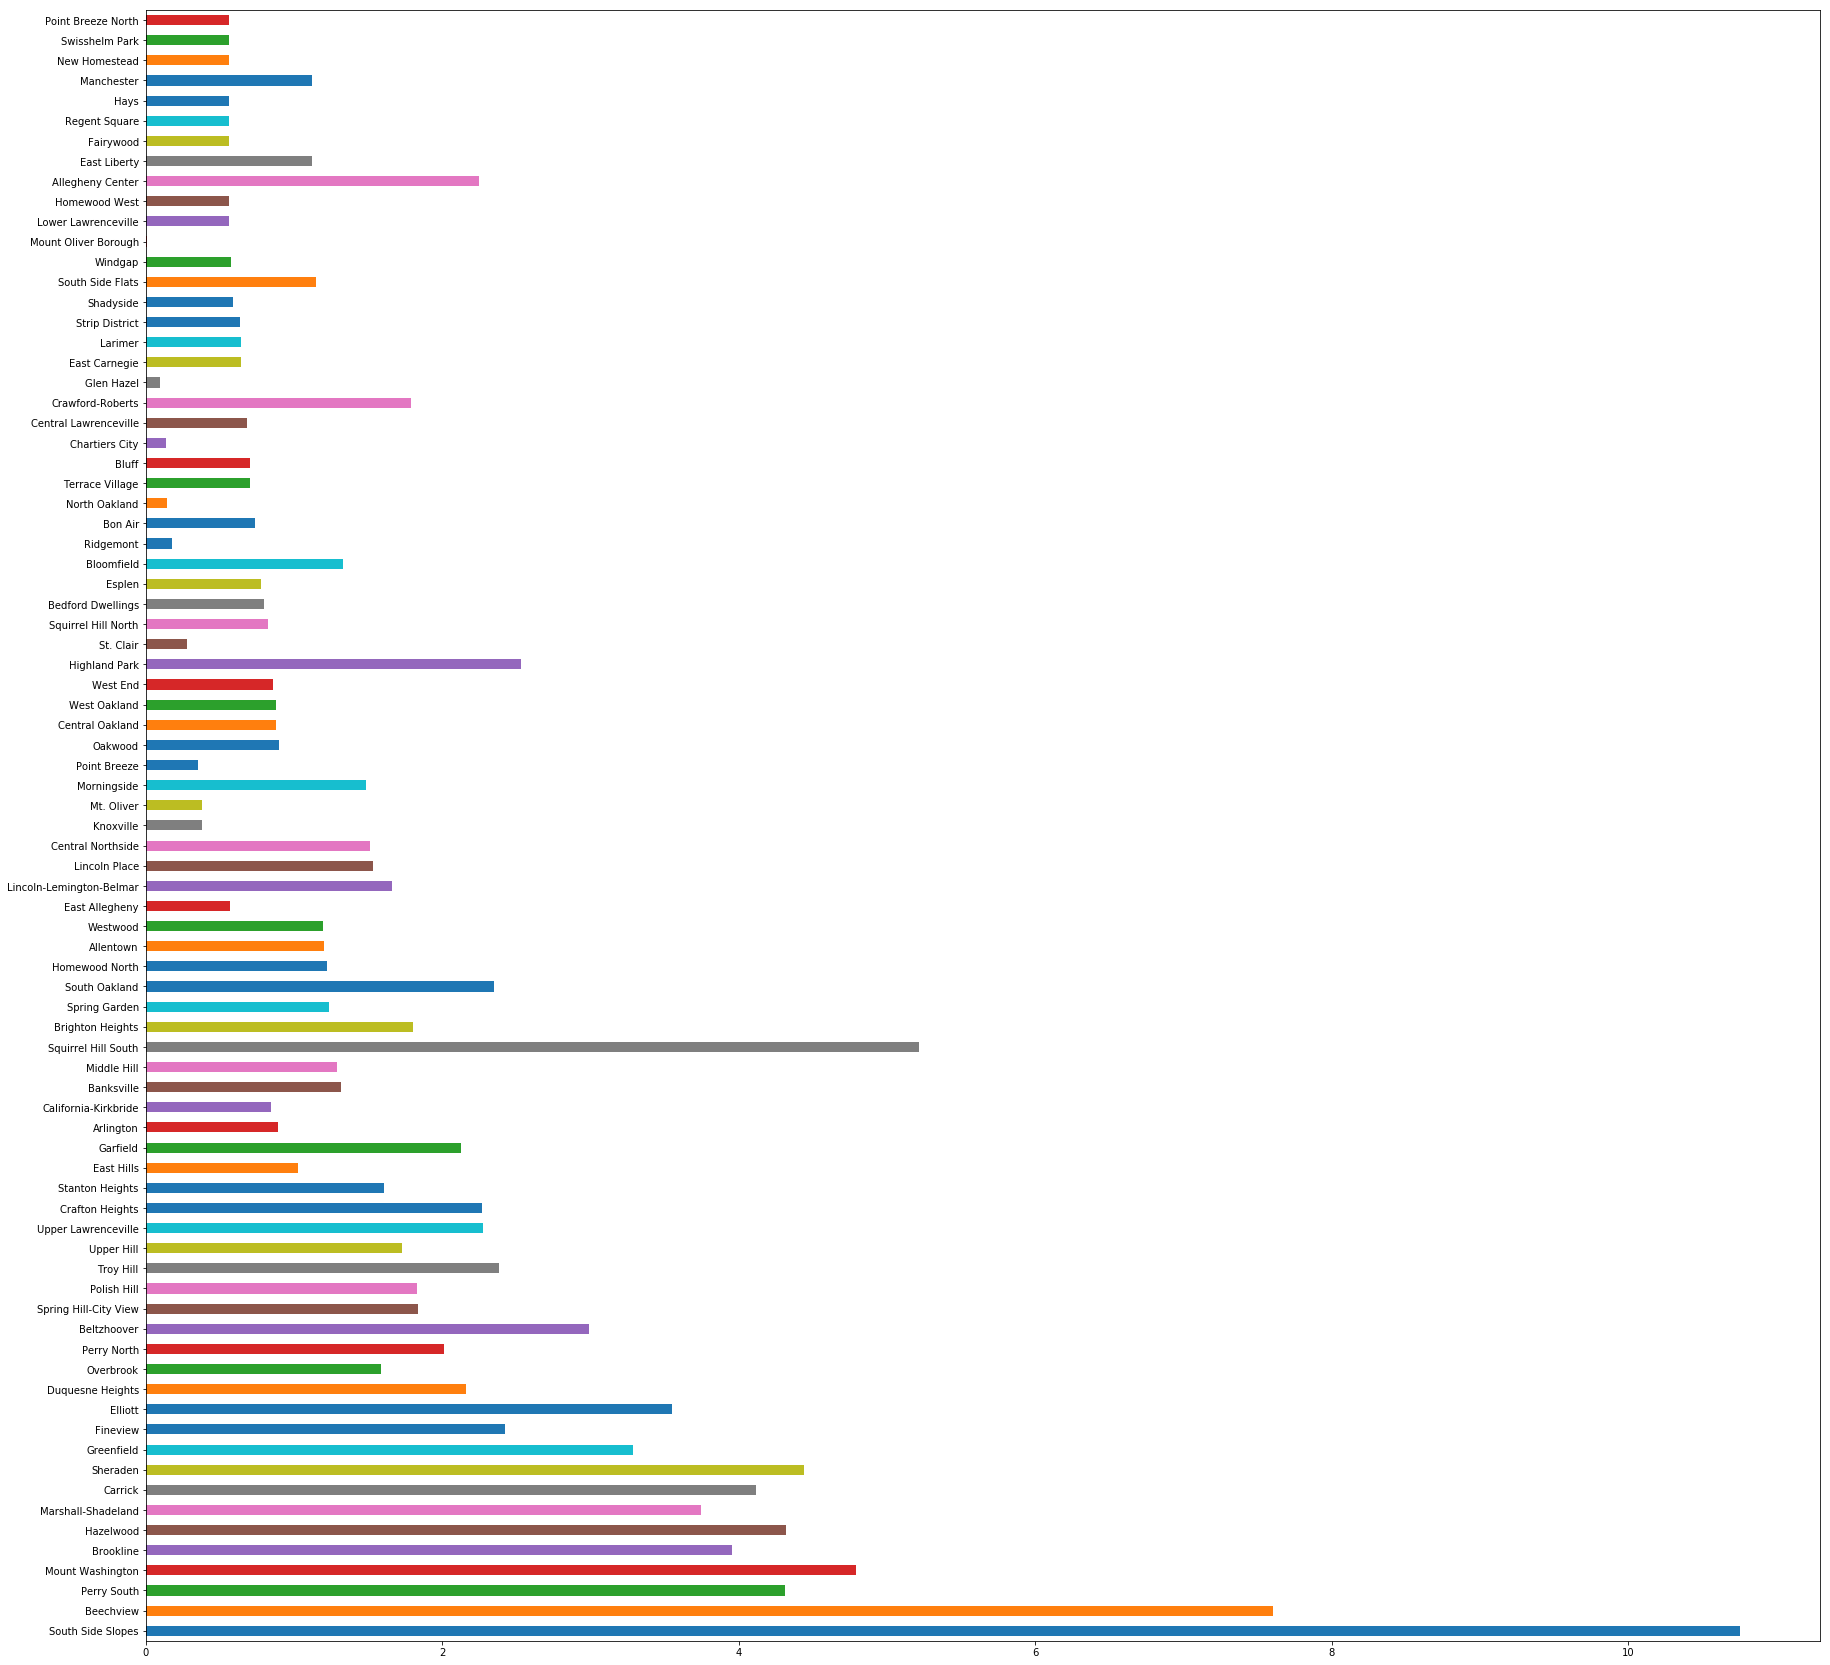

In [108]:
r = pd.Series(agg, name = "DataValue")
r.plot.barh(stacked=True, figsize=(30,30))